# This Project is about use machine learning to predict if a patients have heart disease or not 
This preprocessed dataset is from kaggle but the link is no longer can be accessible so i put the link to the origin dataset (which have 76 attribute) : https://archive.ics.uci.edu/dataset/45/heart+disease
 
+ Some infomation about this project
  - Problem definition : The problem we will be explore is Binary classification that mean we will be predicting a patients have heart disease or not (1 is yes, 0 is no)
  - Data : The dataset is from kaggle like i just said, all of attribute(variables that we'll use to predict our target variable) is patients different medical attributes and the dependent variable(target) is whether or not they have heart disease.
  - Evaluation : 80% of accuracy is good to start. However in the progress of work i may use another evaluation metrics 
  - Features : Here is some infomation about the features that appear in the dataset
    
    1.age: age in years
    
    2.sex: sex (1 = male; 0 = female)
    
    3.cp: chest pain type
     -- Value 0: typical angina
     -- Value 1: atypical angina
     -- Value 2: non-anginal pain
     -- Value 3: asymptomatic
   
    4.trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    
    5.chol: serum cholestoral in mg/dl
    
    6.fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    
    7.restecg: resting electrocardiographic results
     -- Value 0: normal
     -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
    8.thalach: maximum heart rate achieved
    
    9.exang: exercise induced angina (1 = yes; 0 = no)
    
    10.oldpeak = ST depression induced by exercise relative to rest
   
    11.slope: the slope of the peak exercise ST segment
     -- Value 0: upsloping
     -- Value 1: flat
     -- Value 2: downsloping
    
    12.ca: number of major vessels (0-3) colored by flourosopy
    
    13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
    
    14.target: 0 = no disease, 1 = disease
   



# LOAD DATA AND EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#Checking some general data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
#Checking if we have any missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Checking the shape of data set
df.shape

(303, 14)

# Find the correlation of each features and what features affect the target

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

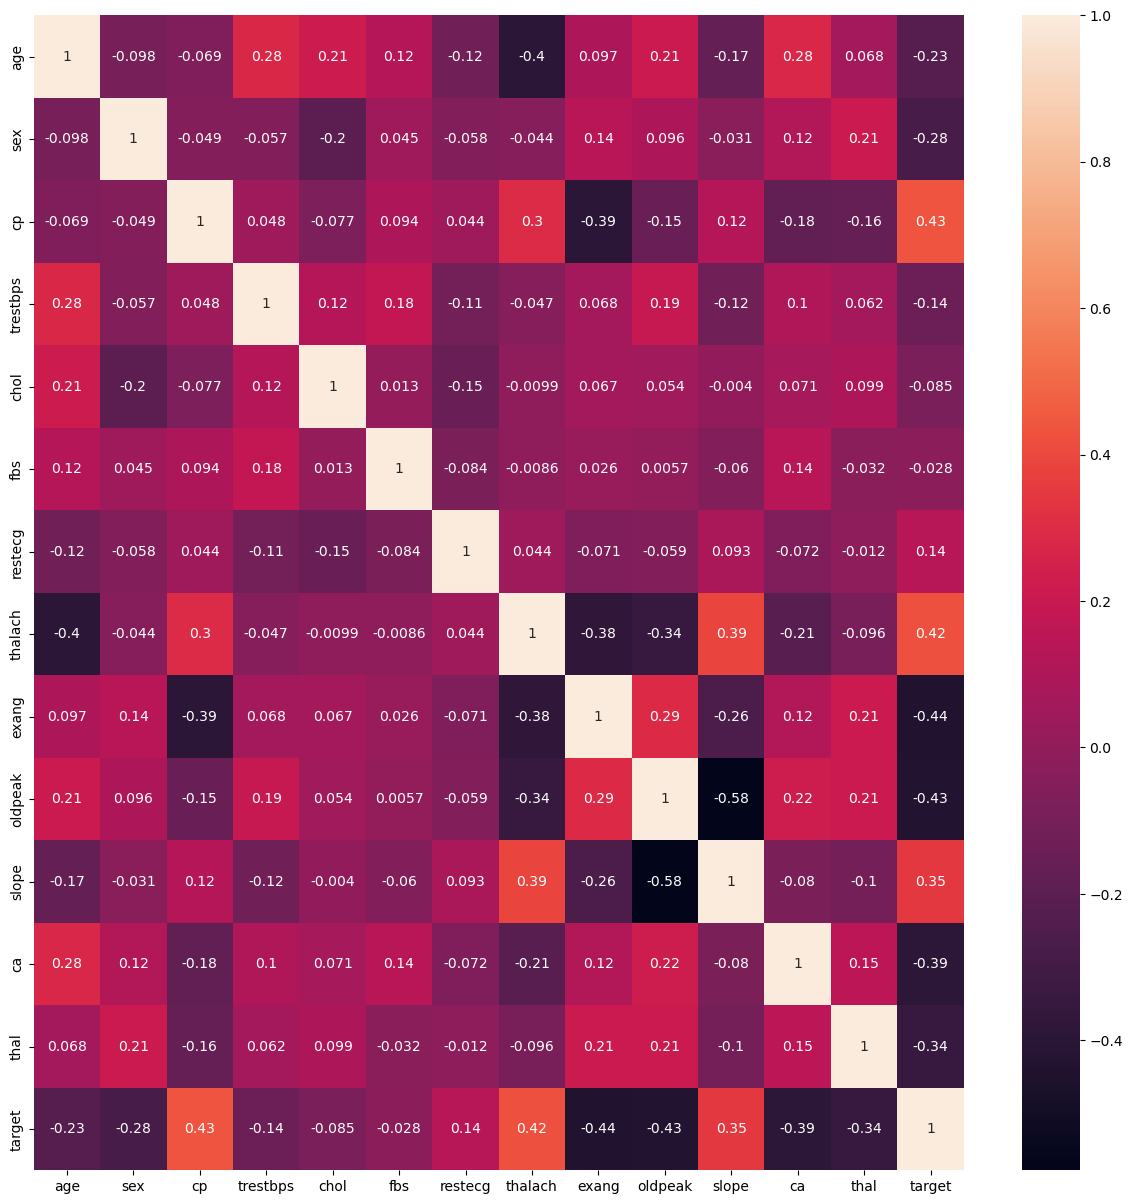

In [8]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
ax = sn.heatmap(corr_matrix,annot=True)

We can see that "CP" , "thalach" have the brightness color and the number is positive that mean there is a statistical relationship between them and the target

# Let visualize them

In [9]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


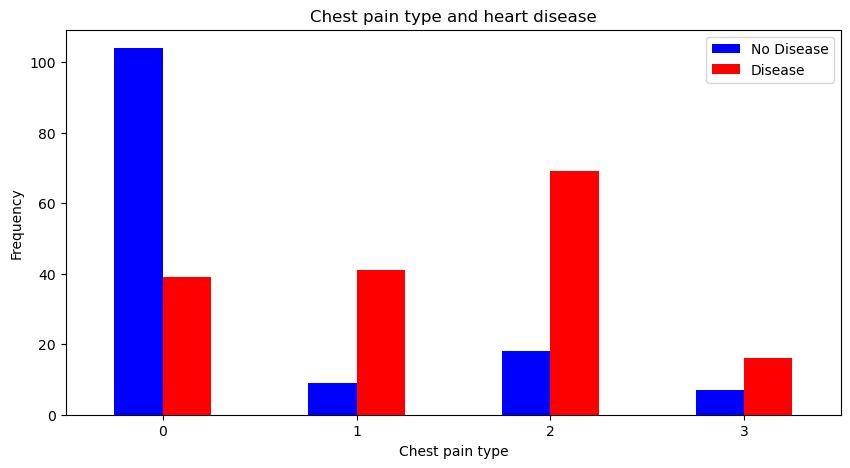

In [10]:
pd.crosstab(df.cp,df.target).plot(kind = 'bar',color = ["blue","red"],figsize = (10,5))
plt.title("Chest pain type and heart disease")
plt.xlabel("Chest pain type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

Look like the non-anginal pain is the most dangerous 

# Let plot the Correlation of Max heart rate and age for heart disease 

In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [12]:
plt.style.use('seaborn-v0_8-whitegrid')

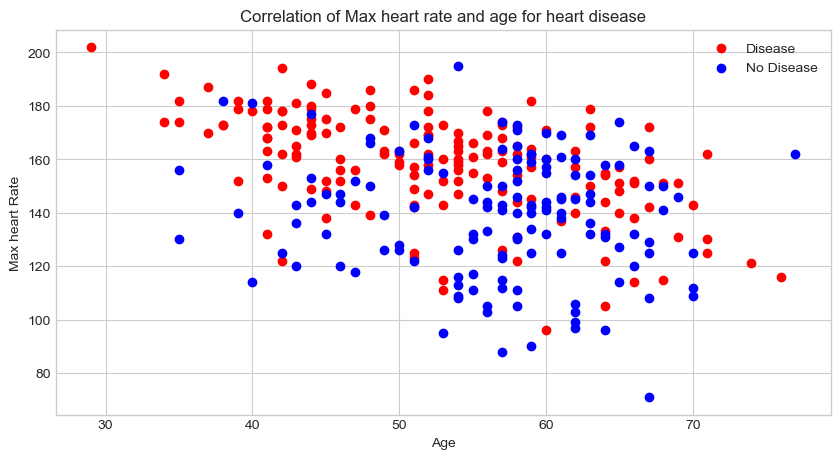

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
scatter1 = ax.scatter(df.age[df.target==1],df.thalach[df.target==1],color = "red")
scatter2 = ax.scatter(df.age[df.target==0],df.thalach[df.target==0],color = "blue");

ax.set(title="Correlation of Max heart rate and age for heart disease",xlabel="Age",ylabel="Max heart Rate");
plt.legend(["Disease", "No Disease"]);

# Comparing other columns (sex and target)


In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Look like we got a title imbalance right here because we have 207 samples for male but for female we only have 96.So let see if gender have effect on heart disease


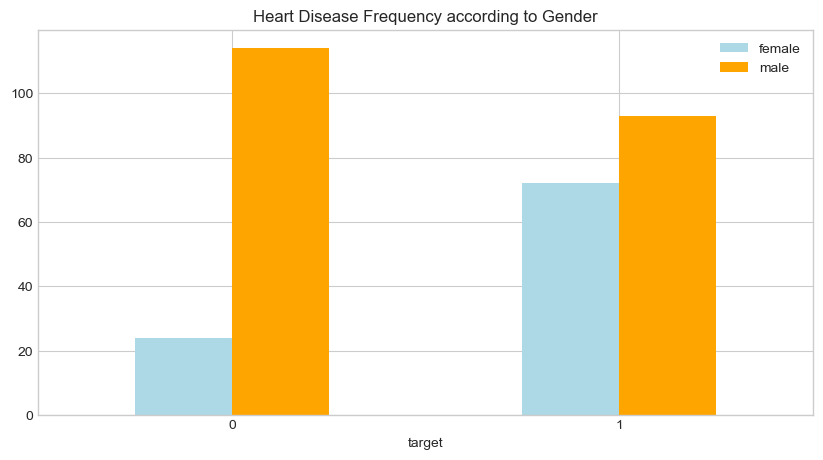

In [16]:
pd.crosstab(df.target,df.sex).plot(kind = 'bar',color = ["lightblue","orange"],figsize = (10,5))
plt.title("Heart Disease Frequency according to Gender")
plt.xticks(rotation = 1)
plt.legend(['female','male'])

- I can calculate the ratio of 1 male patient among male patients with heart disease is about 49%,for the female patients we got about 75% (base on the data).

-> From the calculation above, we can know that there is a 58% to 60% rate that a patient may have heart disease

# Let make a crosstab between sex and chestpain type

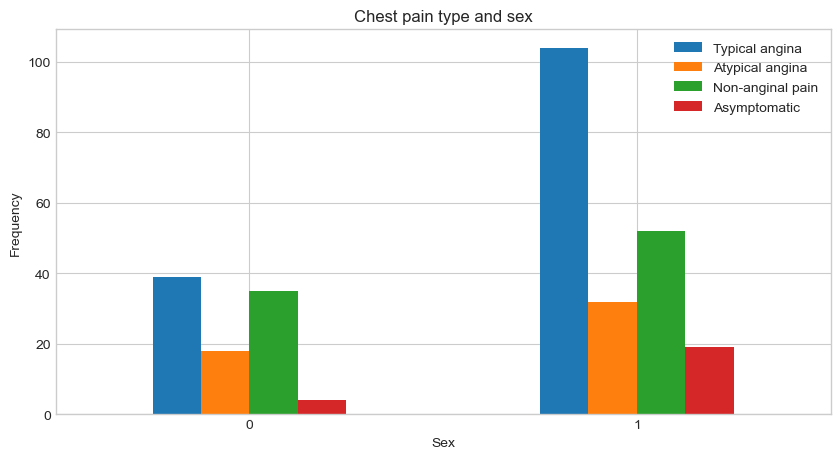

In [17]:
pd.crosstab(df.sex,df.cp).plot(kind = "bar",figsize = (10,5))
plt.title("Chest pain type and sex")
plt.xticks(rotation = True)
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.legend(["Typical angina","Atypical angina","Non-anginal pain","Asymptomatic"])

# Let find the correlation of cholesterol levels and age for heart disease

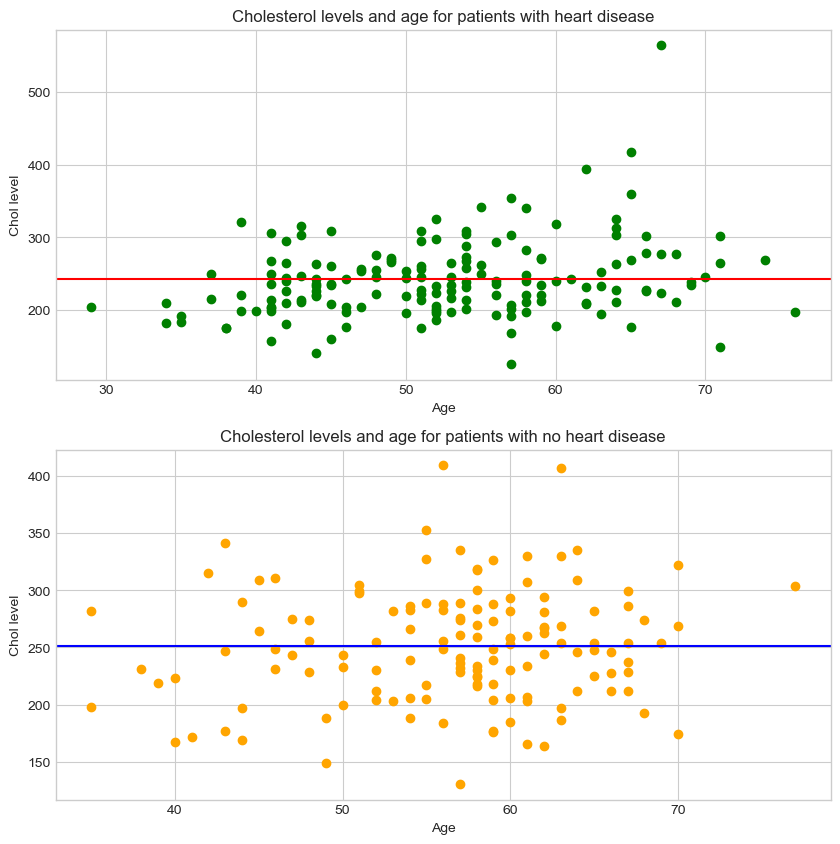

In [18]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (10,10))
scatter1 = ax1.scatter(df.age[df.target==1],df.chol[df.target==1],color = "green")
scatter2 = ax2.scatter(df.age[df.target==0],df.chol[df.target==0],color = "orange")
ax1.set(title="Cholesterol levels and age for patients with heart disease",xlabel="Age",ylabel="Chol level")
ax2.set(title="Cholesterol levels and age for patients with no heart disease",xlabel="Age",ylabel="Chol level")
ax1.axhline(df.chol[df.target==1].mean(),color = 'red')
ax2.axhline(df.chol[df.target==0].mean(),color = 'blue')


- As we can see from the age of 40 to 60 Cholesterol level in blood is increase no matter the patients got heart disease or not and the mean of Cholesterol level of non heart disease patients is higher than the other. 

- The patients who do not have heart disease may experience fluctuations in their blood cholesterol levels depending on their genetics and dietary habits. However, maintaining stable cholesterol levels is important for overall heart health.

# Now its modelling time!!

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Because our data is already in numeric data type so we dont need to change anything

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

-Because the dataset has a data imbalance so i use Ensemble method to prevent 1 model from overfitting and to imporve the accuracy(because it combine insights from multiple different models. Each model may focus on different aspects of the data)

-On the other hand i use KNN for comparing 2 model performance to see which one better

# Split the data

In [36]:
import numpy as np

In [27]:
np.random.seed(69)
df_shuffled = df.sample(frac = 1)

In [29]:
df_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1


In [30]:
X = df_shuffled.drop("target",axis = 1)
y = df_shuffled["target"]

In [34]:
train_split = round(0.7*len(df_shuffled))
valid_split = round(train_split + 0.15 *len(df_shuffled))
X_train,y_train = X[:train_split],y[:train_split]
X_val,y_val = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

# Let train and see the model performance

In [35]:
rclf = RandomForestClassifier()
knn = KNeighborsClassifier()

In [38]:
rclf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [40]:
rclf_preds = rclf.predict(X_val)

In [41]:
knn_preds = knn.predict(X_val)

# We will evaluate the models predict using some metrics 

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [43]:
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metrics_dict ={"accuracy" : round(accuracy,2),
                  "precision" : round(precision,2),
                  "recall" : round(recall,2),
                  "f1" : round(f1,2)}
    
    return metrics_dict

In [45]:
rclf_metrics = evaluate_preds(y_val,rclf_preds)
knn_metrics = evaluate_preds(y_val,knn_preds)

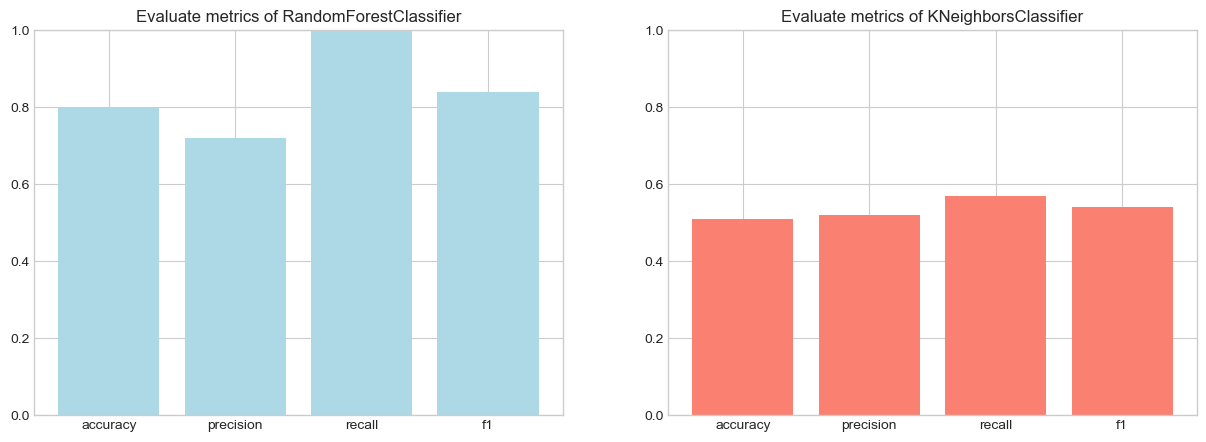

In [99]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (15,5))
rclf_plot = ax1.bar(rclf_metrics.keys(),rclf_metrics.values(),color = "lightblue")
knn_plot = ax2.bar(knn_metrics.keys(),knn_metrics.values(),color = "salmon")
ax1.set(title="Evaluate metrics of RandomForestClassifier",ylim=[0,1])
ax2.set(title="Evaluate metrics of KNeighborsClassifier",ylim=[0,1]);

# Let tune the Hyperparameter of the RandomforestClassifier to improve it even more

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [139]:
param_grid = {
    'n_estimators': [1000,1500,2000],
    'max_depth': [None,3 ,5 ,10 , 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['log2','sqrt']
}

In [140]:
rs_clf = RandomizedSearchCV(rclf,param_distributions=param_grid,n_iter=25,cv = 5,verbose = 2)
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.6s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.6s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.7s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.7s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   1.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1500; total time=   1.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1500; total time=   1.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   1.6s
[CV] END max_depth=None, max_fe

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [1000, 1500, 2000]},
                   verbose=2)

In [142]:
rs_clf.best_score_

0.8489479512735327

In [123]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [143]:
# Evaluate the RandomizedsearchCV RandomForestClassifier model
rs_clf.score(X_test,y_test)

0.8043478260869565

# Evaluate tunned model 

In [145]:
tunned_preds =rs_clf.predict(X_test) 

In [146]:
from sklearn.metrics import RocCurveDisplay

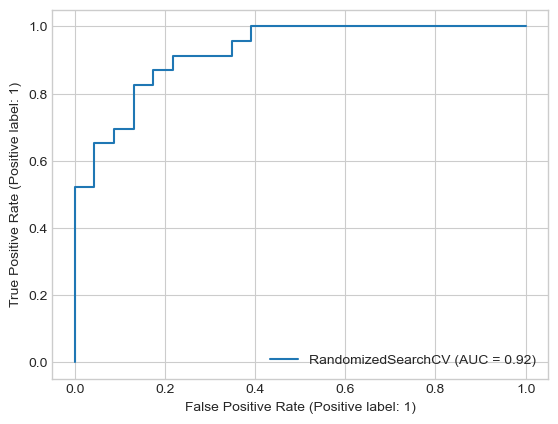

In [148]:
RocCurveDisplay.from_estimator(rs_clf,X_test,y_test)

In [150]:
from sklearn.metrics import confusion_matrix, classification_report

In [151]:
print(classification_report(y_test,tunned_preds))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77        23
           1       0.73      0.96      0.83        23

    accuracy                           0.80        46
   macro avg       0.84      0.80      0.80        46
weighted avg       0.84      0.80      0.80        46



In [152]:
confusion_matrix(y_test,tunned_preds)

array([[15,  8],
       [ 1, 22]], dtype=int64)

In [153]:
import seaborn as sns

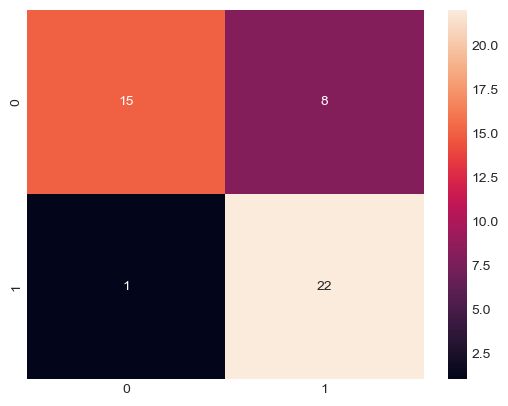

In [166]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test,tunned_preds),annot=True)

# END